In [2]:
%matplotlib inline

In [7]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [8]:
unemp_data = pd.read_csv('http://vega.github.io/vega-datasets/data/unemployment.tsv',sep='\t')
unemp_data.head()

,id,rate
0,1001,0.097
1,1003,0.091
2,1005,0.134
3,1007,0.121
4,1009,0.099


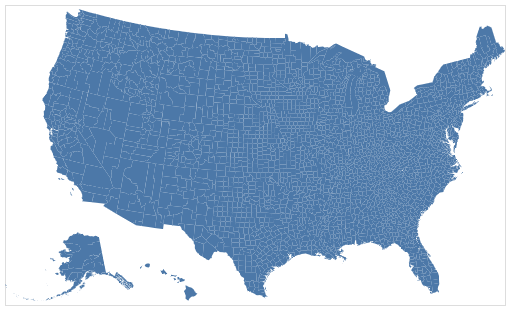

In [9]:
from vega_datasets import data
counties = alt.topo_feature(data.us_10m.url, 'counties')

alt.Chart(counties).mark_geoshape().project(
    type='albersUsa').properties(
    width=500,
    height=300
)

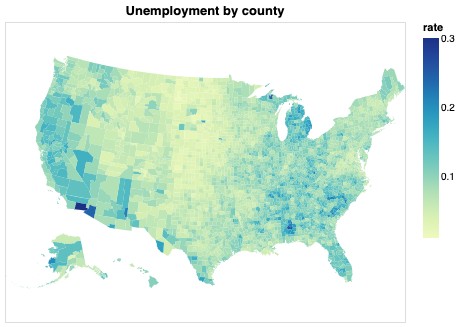

In [10]:
alt.Chart(counties).mark_geoshape(
).encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(unemp_data, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    title='Unemployment by county'
)

In [11]:
import requests
res = requests.get('https://restcountries.eu/rest/v2/alpha/usa')
res.status_code

200

In [12]:
res.json()

{'name': 'United States of America',
 'topLevelDomain': ['.us'],
 'alpha2Code': 'US',
 'alpha3Code': 'USA',
 'callingCodes': ['1'],
 'capital': 'Washington, D.C.',
 'altSpellings': ['US', 'USA', 'United States of America'],
 'region': 'Americas',
 'subregion': 'Northern America',
 'population': 323947000,
 'latlng': [38.0, -97.0],
 'demonym': 'American',
 'area': 9629091.0,
 'gini': 48.0,
 'timezones': ['UTC-12:00',
  'UTC-11:00',
  'UTC-10:00',
  'UTC-09:00',
  'UTC-08:00',
  'UTC-07:00',
  'UTC-06:00',
  'UTC-05:00',
  'UTC-04:00',
  'UTC+10:00',
  'UTC+12:00'],
 'borders': ['CAN', 'MEX'],
 'nativeName': 'United States',
 'numericCode': '840',
 'currencies': [{'code': 'USD',
   'name': 'United States dollar',
   'symbol': '$'}],
 'languages': [{'iso639_1': 'en',
   'iso639_2': 'eng',
   'name': 'English',
   'nativeName': 'English'}],
 'translations': {'de': 'Vereinigte Staaten von Amerika',
  'es': 'Estados Unidos',
  'fr': 'États-Unis',
  'ja': 'アメリカ合衆国',
  'it': "Stati Uniti D'Ame

In [17]:
# Q-1: What is the numericCode for the country of Peru?
df_countries = pd.read_csv('~/Downloads/world_countries.csv')
df_countries.query('Country == "Peru"')

,Country,Code,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,...,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
159,Peru,PER,LATIN AMER. & CARIB,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,...,79.5,2.89,0.4,96.71,1.5,20.48,6.23,0.08,0.27,0.65


In [18]:
res = requests.get('https://restcountries.eu/rest/v2/alpha/per')
res.json()['numericCode']

'604'

In [20]:
# Q-2: Copy and paste the list of the three letter country codes of the countries that border Peru. 
# Do not include the square brackets.
str(res.json()['borders'])[1:-1]

"'BOL', 'BRA', 'CHL', 'COL', 'ECU'"

In [22]:
# Q-3: How many keys are in the dictionary returned for the country of Peru?
len(res.json())

24

In [26]:
def get_num_code(alpha_code):
    res = requests.get(f'https://restcountries.eu/rest/v2/alpha/{alpha_code}')
    assert res.status_code == 200
    return res.json()['numericCode']

df_countries['CodeNum'] = df_countries['Code'].map(get_num_code)
df_countries.head()

,Country,Code,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,CodeNum
0,Afghanistan,AFG,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,004
1,Albania,ALB,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,008
2,Algeria,DZA,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,012
3,American Samoa,ASM,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN,016
4,Andorra,AND,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN,020


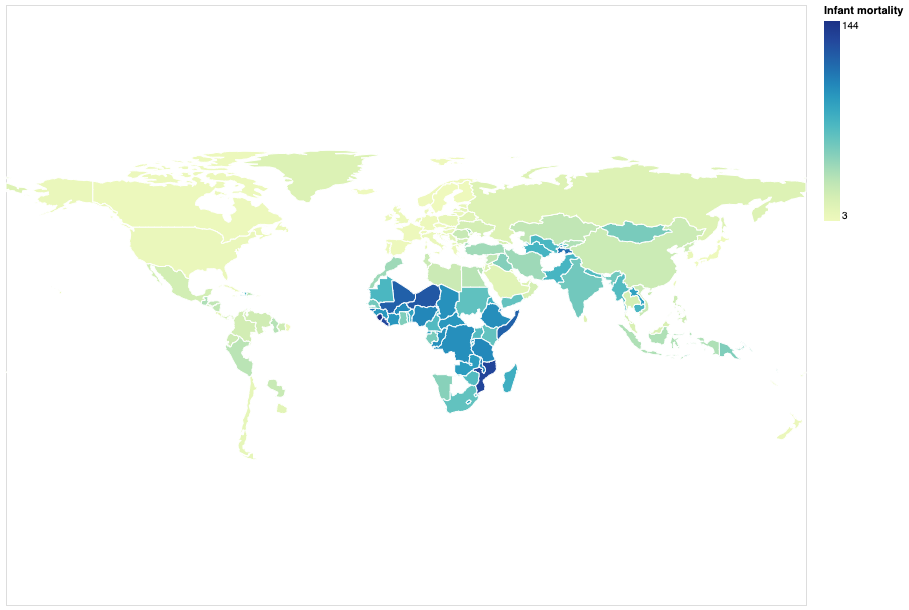

In [43]:
countries = alt.topo_feature(data.world_110m.url, 'countries')

alt.Chart(countries).mark_geoshape(
    fill='#666666',
    stroke='white'
).encode(
    color='Infant mortality:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df_countries, 'CodeNum', ['Infant mortality'])
).properties(
    width=800,
    height=600
).project('equirectangular')